In [1]:
import os
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date


import ipywidgets as widgets
from ipywidgets import interact, interact_manual


######PER IGNORARE I WARNINGS#########
######da attivare a notebook finito per motivi estetici#######
#import warnings
#warnings.filterwarnings('ignore')
##############################################################


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/pcm-dpc/COVID-19"
COVID_PATH = os.path.join("datasets", "covid")
COVID_REGIONI_URL = DOWNLOAD_ROOT + "/master/dati-regioni/dpc-covid19-ita-regioni.csv"
COVID_PROVINCE_URL = DOWNLOAD_ROOT + "/master/dati-province/dpc-covid19-ita-province.csv"
COVID_NAZIONE_URL = DOWNLOAD_ROOT + "/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
url_dict={'regioni.csv':COVID_REGIONI_URL,'province.csv':COVID_PROVINCE_URL,'nazione.csv':COVID_NAZIONE_URL}
def fetch_dati(url,file,path=COVID_PATH):
    os.makedirs(path, exist_ok=True)
    newpath=os.path.join(path, file)
    urllib.request.urlretrieve(url, newpath)
def load_dati(file,path=COVID_PATH):
    csv_path=os.path.join(path, file)
    return pd.read_csv(csv_path)

fetch_dati(COVID_REGIONI_URL,file='regioni.csv')
regioni=load_dati('regioni.csv')
fetch_dati(COVID_PROVINCE_URL,file='province.csv')
province=load_dati('province.csv')
fetch_dati(COVID_NAZIONE_URL,file='nazione.csv')
nazione=load_dati('nazione.csv')

Some data is useless, and is now removed

In [2]:
#regioni
day=regioni.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
    #Per estrarre mese e giorno prendiamo i caratteri dal 5 al 9 inclusi della feature "data"
regioni.insert(0,column='day', value=day)

#province
day=province.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
province.insert(0,column='day', value=day)

#nazione
day=nazione.data.copy()
day=np.array(day)
for i in range(len(day)):
    day[i]=day[i][5:10]
nazione.insert(0,column='day', value=day)

In [6]:
regioni

,day,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,02-24,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5
1,02-24,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0
2,02-24,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1
3,02-24,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1
4,02-24,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,03-31,Toscana,43.769231,11.255889,1120,293,1413,2813,4226,176,196,138,244,4608,33165
773,03-31,P.A. Trento,46.068935,11.121231,354,80,434,955,1389,32,64,193,164,1746,6973
774,03-31,Umbria,43.106758,12.388247,176,43,219,632,851,17,27,190,37,1078,8685
775,03-31,Valle d'Aosta,45.737503,7.320149,91,26,117,435,552,34,44,20,56,628,1582


In [10]:
@interact
def show_cities_with_more_than(column=['totale_casi', 'terapia_intensiva'], x=(10, 1000)):
    return regioni.loc[regioni[column] > x]

interactive(children=(Dropdown(description='column', options=('totale_casi', 'terapia_intensiva'), value='tota…

In [21]:
import cufflinks as cf
import chart_studio.plotly 
#chart_studio

#Provo momentaneamente a rimuovere titoli ed effetto grafico per vedere se si alleggerisce
#Dopo un lungo caricamento mi da  Authentication credentials were not provided. DEVO LAVORARCI ANCORA

df=regioni
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
                 #theme=list(cf.themes.THEMES.keys()), 
                 #colorscale=list(cf.colors._scales_names.keys())
                 
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title())
             #text='title',
             #title=f'{y.title()} vs {x.title()}',
            #theme=theme, colorscale=colorscale
            

interactive(children=(Dropdown(description='x', options=('lat', 'long', 'ricoverati_con_sintomi', 'terapia_int…

In [277]:
province

,day,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note_it,note_en
0,02-24,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
1,02-24,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2,02-24,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
3,02-24,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
4,02-24,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,03-30,2020-03-30T17:00:00,ITA,5,Veneto,26,Treviso,TV,45.667546,12.245074,1449,NaN,NaN
4604,03-30,2020-03-30T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,1107,NaN,NaN
4605,03-30,2020-03-30T17:00:00,ITA,5,Veneto,23,Verona,VR,45.438390,10.993527,1982,NaN,NaN
4606,03-30,2020-03-30T17:00:00,ITA,5,Veneto,24,Vicenza,VI,45.547497,11.545971,1168,NaN,NaN


then we drop the 'data' & 'stato' column which are now useless

In [278]:
def combine_to_dict(df,upto,f1,f2):
    d12={}
    d21={}
    for i in range(upto):
        one=df.at[i,f1]
        two=df.at[i,f2]
        d12[one]=two
        d21[two]=one
    return d12,d21
reg_num_as_key,reg_name_as_key=combine_to_dict(regioni,20,f1='codice_regione',f2='denominazione_regione')
prov_num_as_key,prov_name_as_key=combine_to_dict(province,128,f1='codice_provincia',f2='denominazione_provincia')
#Per inciso, quello delle prov ha qualcosa che non va


#Queeste righe bastano per le regioni
reg_codes=pd.DataFrame(data=regioni, columns=["denominazione_regione", "codice_regione"])
num=len(reg_codes)-21
reg_codes.drop(reg_codes.tail(num).index, inplace=True)
#Province è un po'infame, ha bassa priorità ma magari lo farò

now we try to create a dataframe/dictionary which combines values of codice_regione with values of denominazione_regione

we know there are 20 regions so it is enough to access the data frame up to the 20th row. 

In [3]:
regioni=regioni.drop(['data','stato', 'codice_regione', 'note_it', 'note_en'],axis=1, errors="ignore")
province=province.drop(['data','stato','codice_regione', 'codice_provincia', 'note_it', 'note_en'],axis=1, errors="ignore")
nazione=nazione.drop(['data','stato', 'note_it', 'note_en'],axis=1, errors="ignore")

now we will shorten the dataframe so that we store in another dataframe the longitude and latitude coordinates which do not change at all

In [280]:
def combine_to_datfr(df,row,col,upto):
    ind=[row[i] for i in range(upto)]
    dt=[]
    for i in range(upto):
        d=[]
        for feat in col:
            el=df.at[i,feat]
            d.append(el)
        dt.append(d)
    ret=pd.DataFrame(data=dt,index=ind,columns=col)
    return ret
def create_geo_loc(df):
    geo_loc=regioni.denominazione_regione.copy()
    geo_loc=pd.DataFrame(data=geo_loc)
    geo_loc["lat"]=regioni.lat.copy()
    geo_loc["long"]=regioni.long.copy()
    num=len(geo_loc)-21
    geo_loc.drop(geo_loc.tail(num).index,inplace=True)
    return geo_loc


def create_geo_loc_2(df):
    if "denominazione_provincia" in df.columns:
        denom="denominazione_provincia"
        cont=80
    else:
        denom="denominazione_regione"
        cont=21
    geo_loc=pd.DataFrame(data=df,columns=[denom, "lat", "long"])
    #geo_loc.drop(geo_loc.loc[geo_loc['lat'] == 0])
    num=len(geo_loc)-cont
    geo_loc.drop(geo_loc.tail(num).index,inplace=True)
    return geo_loc

#TODO: Sceglierne una (io voto per create_geo_loc_2  :) )


new=combine_to_datfr(regioni,regioni.denominazione_regione,['lat','long'],21)
#new=combine_to_datfr(province,province.denominazione_provincia,['lat','long'],80)
#Anche qua province ha qualche problema, suppongo per problema intrinseco al dataset

#nemmeno il mio funziona con le province al momento

new=create_geo_loc_2(province)

#new


# A first analysis

as we can see, we have each day a number of measurements for 21 regions (numbered from 1 to 20)

we can simply extract the number of observations of the civil protection by dividing the shape of the dataframe by 21

In [281]:
n_obs=int(regioni.shape[0]/21)
n_reg=21

#the following is a function to extract data from a single instance, as day, region, province or anything else
def get_instance(dataset,instance,some,avoid=None):
    #unclear the "Avoid" part
    dt=dataset.copy()
    new=dt.loc[dt[instance]==some]
    if avoid!=None:
        if not isinstance(avoid,list):
            avoid=list(avoid)
        new.drop(avoid,axis=1,inplace=True)
    new=new.reset_index(drop=True)
    return new

#the following is a function to extract a single regione
def get_regione(name, df=regioni):
    df_copy=df.copy()
    dati_regione = df_copy.loc[df['denominazione_regione'] == name]
    dati_regione.drop(["denominazione_regione", "lat", "long"], axis=1, inplace=True)
    dati_regione=dati_regione.reset_index(drop=True)
    return dati_regione

#the following is a function to extract data about a single day
def get_giorno(df, day):
    return df.loc[df['day'] == day]

#the following is a function to extract a single province
def get_provincia(name, df=province): 
    df_copy=df.copy()
    dati_provincia = df_copy.loc[df_copy['denominazione_provincia'] == name]
    dati_provincia.drop(["denominazione_regione", "lat", "long", "denominazione_provincia", "sigla_provincia"], axis=1, inplace=True)
    dati_provincia=dati_provincia.reset_index(drop=True)
    return dati_provincia

#the following is a function to get the whole region data for each province
def get_regione_by_provincia(name,df=province):
    df_copy=df.copy()
    dati_regione = df_copy.loc[df['denominazione_regione'] == name]
    dati_regione.drop(["denominazione_regione", "lat", "long"], axis=1, inplace=True)
    dati_regione=dati_regione.reset_index(drop=True)
    return dati_regione

#the following is a function to get the list of provinces of a region
def get_provincia_list(reg,df=province):
    a=get_regione_by_provincia(reg,df=province)
    return a.denominazione_provincia.unique()


get_instance(regioni,"denominazione_regione","Toscana")




,day,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,02-24,Toscana,43.769231,11.255889,0,0,0,0,0,0,0,0,0,0,140
1,02-25,Toscana,43.769231,11.255889,2,0,2,0,2,2,2,0,0,2,296
2,02-26,Toscana,43.769231,11.255889,2,0,2,0,2,0,0,0,0,2,363
3,02-27,Toscana,43.769231,11.255889,2,0,2,0,2,0,0,0,0,2,410
4,02-28,Toscana,43.769231,11.255889,5,0,5,2,7,5,6,1,0,8,437
5,02-29,Toscana,43.769231,11.255889,7,0,7,3,10,3,3,1,0,11,531
6,03-01,Toscana,43.769231,11.255889,7,0,7,5,12,2,2,1,0,13,572
7,03-02,Toscana,43.769231,11.255889,7,0,7,5,12,0,0,1,0,13,613
8,03-03,Toscana,43.769231,11.255889,10,0,10,8,18,6,6,1,0,19,697
9,03-04,Toscana,43.769231,11.255889,15,2,17,20,37,19,19,1,0,38,776


In the next cell we find some function which may later become useful

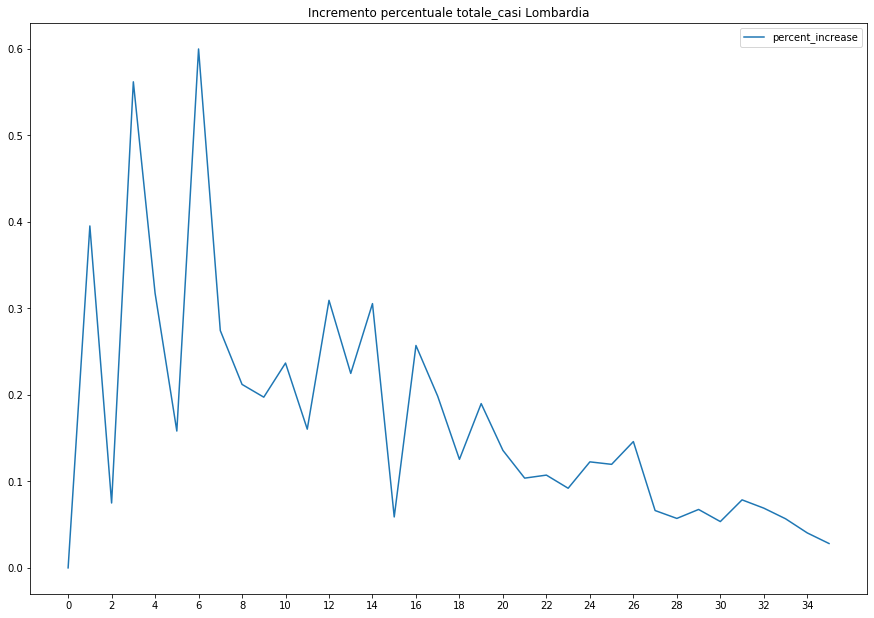

In [282]:
#def compute_perc_increase(df,feature):
#    feat = df[feature].copy()
#    feat=feat.pct_change()
#    increase=pd.DataFrame(data=feat, index=df.index)
#    increase.set_axis(['percent_increase'], axis=1, inplace=True)
#    if not increase.columns.any=='day':
#        increase.insert(0,column='day',value=df['day']) #->non è generale, in alcuni casi day c'è già, quindi dà errore
#    increase.fillna(0,inplace=True)
#    return increase


def compute_increase(df,feature):
    feat = df[feature].copy()
    feat=np.array(feat)
    incr=feat.copy()
    incr[1:]=feat[1:]-feat[:-1]
    increase=pd.DataFrame(data=incr, index=df.index)
    increase.set_axis(['increase'], axis=1, inplace=True)
    if not increase.columns.any=='day':
        increase.insert(0,column='day',value=df['day'])
    return increase



def compute_perc_increase(df_name,feature, where=None):
    if df_name=="province":
        df=get_provincia(where)
    elif df_name=="regioni":
        df=get_regione(where)
    else:
        df=nazione
    increase=pd.DataFrame(data=df[feature].pct_change(), index=df.index)
    increase.set_axis(['percent_increase'], axis=1, inplace=True)
    if not increase.columns.any=='day':
        increase.insert(0,column='day',value=df['day'])
    increase.fillna(0,inplace=True)
    if not np.isfinite(increase['percent_increase']).all():
        aux=increase.loc[increase['percent_increase'] == np.inf]
        to_del=np.arange(aux.iloc[0].name+1)
        increase.drop(to_del, inplace=True)
    #increase.set_index("day", inplace=True)
    
    return increase

#Ho cambiato leggermente per farla funzionare, e poi automaticamente "pulisce" degli 0 e infinito
feature="totale_casi"
where="Lombardia"
inds_X=np.arange(len(nazione))[::2]
compute_perc_increase("regioni",feature, where).plot(figsize=(15,10.5),xticks=inds_X, title="Incremento percentuale " + feature + " " + where)





In [283]:
#Indice: rapporto fra il numero di nuovi positivi (NP) e il numero totale di attualmente positivi

ind_NP=pd.DataFrame(data=nazione, columns=["day"])
ind_NP["NP_Index"]=nazione["nuovi_attualmente_positivi"]/nazione["totale_attualmente_positivi"]*100
ind_NP.set_index("day", inplace=True)
inds_X=np.arange(len(ind_NP))[::2]
ind_NP.plot(figsize=(15,10.5), xticks=inds_X, title="NP_Index: Rapporto percenetuale fra il numero di nuovi positivi (NP) e il numero totale di attualmente positivi")


#Indice di terapia intensiva: quanti dei malati vanno in TI?
ind_TI=nazione["terapia_intensiva"]/nazione["totale_attualmente_positivi"]*100
ti=pd.DataFrame(data=ind_TI, columns=["TI_Index"])
ti["day"]=nazione["day"].copy()
ti.set_index("day", inplace=True)
inds_X=np.arange(len(ti))[::2]
ti.plot(figsize=(15,10.5), xticks=inds_X, title="TI_Index: Rapporto percenetuale fra il numero di pazienti in terapia intensiva e il numero totale di attualmente positivi")

KeyError: 'nuovi_attualmente_positivi'

# Geographical Plotting attempt

In [ ]:
#Hack to fix missing PROJ4 env var
import os
import conda
import numpy as np
import matplotlib.pyplot as plt

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

    
def plotMap(coloredGraph=False):
    plt.figure(figsize=(20,20))
    if coloredGraph:
        m = Basemap(resolution='l', llcrnrlon=6., llcrnrlat=36.555361, urcrnrlon=18.524427, urcrnrlat=47.225514, epsg=4265)
        #m.bluemarble() -> Più veloce ma low res
        m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= False)
        #m.shadedrelief()
        frameon=True
    else:
        m = Basemap(resolution='i', llcrnrlon=6., llcrnrlat=36.555361, urcrnrlon=18.524427, urcrnrlat=47.225514)
        m.drawmapboundary(fill_color='#85A6D9')
        m.fillcontinents(color='white',lake_color='#85A6D9')
        m.drawcoastlines(color='#6D5F47', linewidth=.4)
        m.drawcountries(color='#6D5F47', linewidth=.4)
        frameon=False
        #m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb')
        #m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')


    #Pulizia database
    prov_today=get_giorno(province, "03-28")
    prov_today=prov_today.reset_index(drop=True)
    inds=np.flatnonzero(prov_today["lat"]==0)
    prov_today = prov_today.drop(inds, axis=0)

    #Numpyzzazione
    lats = prov_today.lat.to_numpy()
    lngs = prov_today.long.to_numpy()
    
    #Scaling
    populations = prov_today["totale_casi"].to_numpy()/5
    x,y = m(lngs,lats)
    
    #Scattering
    m.scatter(
        x,
        y,
        s=populations, #size
        c='red', #color
        marker='o', #symbol
        alpha=0.7, #transparency
        zorder = 2, #plotting order
        )

    #Prendo i quantili per la legenda
    quant_25=int(prov_today.quantile(0.25)["totale_casi"])
    quant_50=int(prov_today.quantile(0.5)["totale_casi"])
    quant_75=int(prov_today.quantile(0.75)["totale_casi"])

    for a in [quant_25, quant_50, quant_75]:
        a=a-a%10
        plt.scatter([], [], c='red', alpha=0.5, s=a,
                    label=str(a) + ' casi')
    plt.legend(scatterpoints=1, frameon=frameon,
               labelspacing=2, loc='lower left', fontsize="large");

    plt.title('Diomerda')
    plt.show()
    
plotMap(True)

In [ ]:
plotMap()

In [284]:
#OLD GEO PLOTTING
#today = date.today()
#day=today.strftime("%m-%d")
#prov_today=get_giorno(province, day)

#prov_today=prov_today.reset_index(drop=True)

#inds=np.flatnonzero(prov_today["lat"]==0)
#prov_today = prov_today.drop(inds, axis=0)

#import matplotlib.image as mpimg
#italy_img=mpimg.imread('/Users/admin/Desktop/regions-of-italy-italian-empire-vector-map-png-favpng-HN9ySTV4wneV0n2Wsp0beqddp.jpg')


#ax=prov_today.plot(kind='scatter', x="long", y="lat", alpha=0.4,
#     s=prov_today["totale_casi"], label="casi", figsize=(15,10.5))
#plt.imshow(italy_img,extent=[min(prov_today['long']),max(prov_today['long']),min(prov_today['lat']),max(prov_today['lat'])],alpha=0.7, cmap=plt.get_cmap("jet"))
#plt.xlabel('Longitude',fontsize=14)
#plt.ylabel('Latitude',fontsize=14)
#plt.legend(fontsize=14,loc='best')
#plt.show()

With the above functions we can analyze the province of Pisa for example

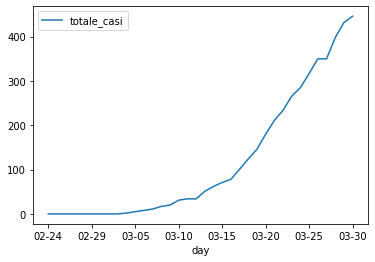

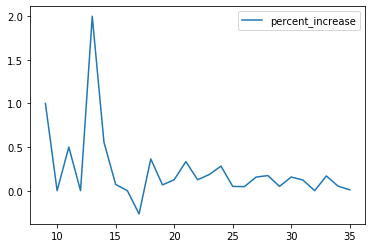

In [285]:
pisa=get_provincia("Pisa",province)
pisa.set_index("day", inplace=True)
pisa.plot()
increase=compute_perc_increase("province","totale_casi", "Cagliari")
increase.plot()

Since we will need a lot of plotting, we now define a function to plot any two variables from the dataframe

In [286]:
def plot_df(df,asc,ords,kind='line'):
    plt.clf()
    if asc=='day':
        inds_x=np.arange(len(df))[::2]
        inds_y=np.linspace(min(df[ords]),max(df[ords]),num=20)
    else:
        inds_x=np.linspace(min(df[asc]),max(df[asc]),num=20)
        inds_y=np.linspace(min(df[ords]),max(df[ords]),num=20)
        
    ax=df.plot(x=asc,y=ords,label=ords+' over '+asc,figsize=(15,10.5),xticks=inds_x,yticks=inds_y,kind=kind)
    
    plt.xlabel(asc,fontsize=14)
    plt.ylabel(ords,fontsize=14)
    plt.legend(fontsize=14,loc='best')
    plt.show()

def multi_plot_df(dlist,asc,ords,names=None,kind='line'):
    plt.clf()
    if names==None:
        names=[str(i+1) for i in range(len(dlist))] 
    if asc=='day':
        inds_x=np.arange(len(dlist[0][asc]))[::2]
    ax=dlist[0].plot(x=asc,y=ords,label=names[0],figsize=(15,10.5),kind=kind)
    dlist.remove(dlist[0])
    names.remove(names[0])
    for df in dlist:
        df.plot(ax=ax,x=asc,y=ords,label=names[dlist.index(df)],figsize=(15,10.5),kind=kind)
    
    plt.title(ords+' over '+asc,fontsize=20)
    plt.xlabel(asc,fontsize=14)
    plt.ylabel(ords,fontsize=14)
    plt.legend(fontsize=14,loc='best')
    plt.show()

In [287]:
Lom=get_regione('Lombardia',regioni)
Ven=get_regione('Veneto',regioni)
multi_plot_df([Lom,Ven],'terapia_intensiva','totale_attualmente_positivi', names=['Lombardia','Veneto'])



KeyError: 'totale_attualmente_positivi'

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

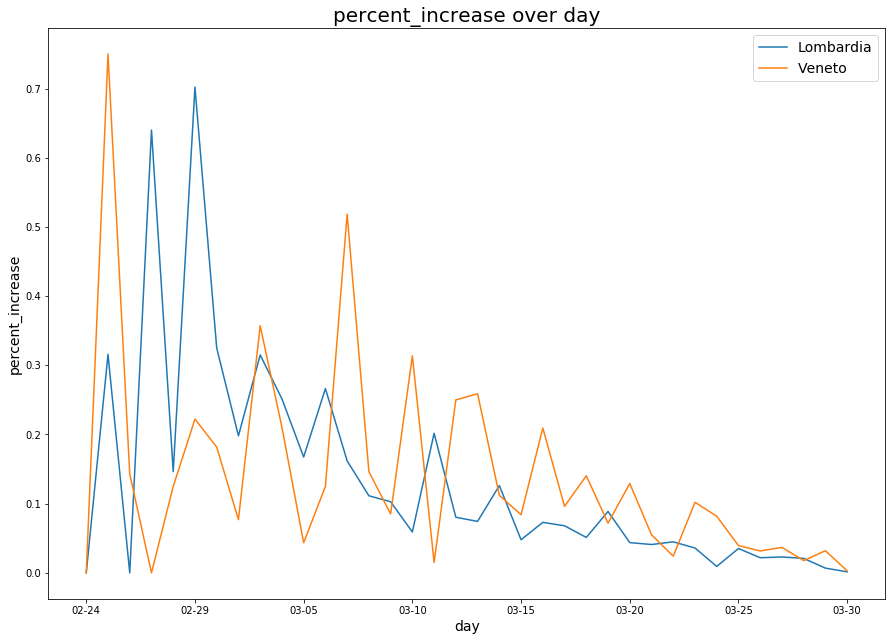

In [288]:
multi_plot_df([compute_perc_increase("regioni",'terapia_intensiva', "Lombardia"),compute_perc_increase("regioni", "terapia_intensiva", "Veneto")],
              'day','percent_increase',names=['Lombardia','Veneto'])

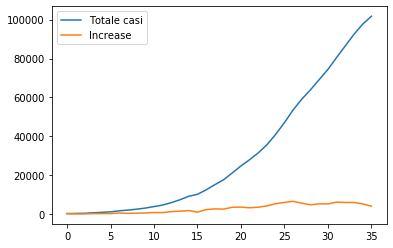

In [20]:
tot=plt.plot(nazione["totale_casi"], label="Totale casi")
#incr=plt.plot(compute_perc_increase("nazione", "totale_casi")["percent_increase"], label="Percent Increase")
incr=plt.plot(compute_increase(nazione, "totale_casi")["increase"], label="Increase")
plt.legend()

We now try to guess if the current decrease in positive cases is good news in Lombardy & the whole Italy

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


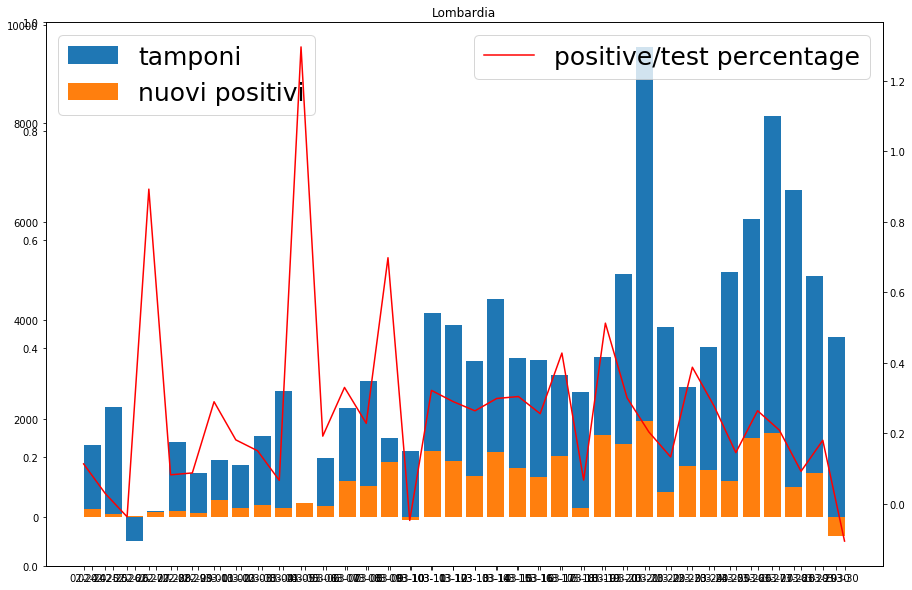

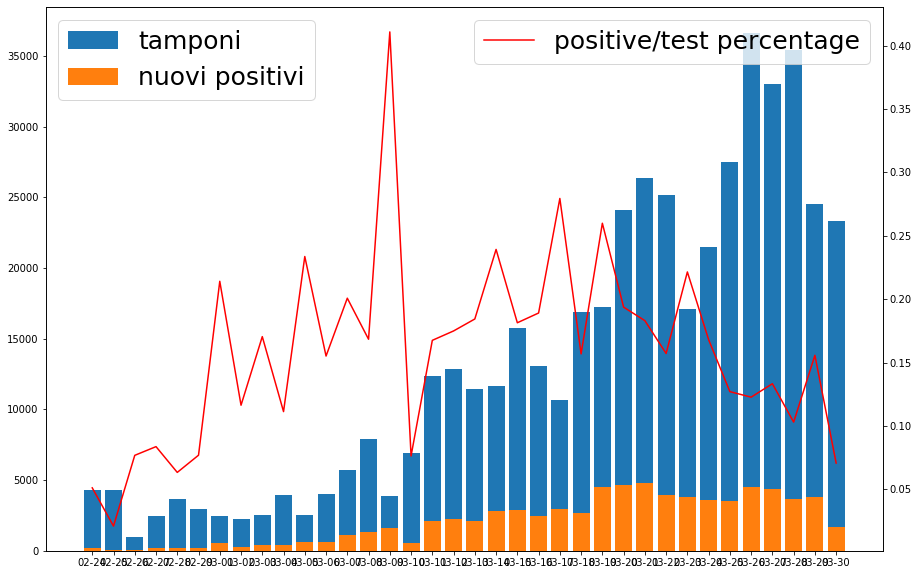

In [254]:
##da ordinare ma è un bel topic### Legenda troppo grande
##################################


%matplotlib inline
Lom=get_regione('Lombardia',regioni)
tamp_lom=compute_increase(Lom,'tamponi')
tamp_nat=compute_increase(nazione,'tamponi')
succ_nat=nazione['nuovi_attualmente_positivi']/tamp_nat['increase']
succ_lom=Lom['nuovi_attualmente_positivi']/tamp_lom['increase']

fig,ax1=plt.subplots(figsize=(15,10))
fig.add_subplot(111)
plt.title('Lombardia')
plt.bar(tamp_lom['day'],tamp_lom['increase'],label='tamponi')
plt.bar(Lom['day'],Lom['nuovi_attualmente_positivi'],label='nuovi positivi')
plt.legend(loc='upper left',fontsize=25)
ax2=ax1.twinx()
ax2.plot(Lom['day'],succ_lom,label='positive/test percentage',c='r')
ax2.legend(loc='upper right',fontsize=25)
#ax.setxticks([])
fig2,ax1=plt.subplots(figsize=(15,10))
#fig2.addsubplot(111)
plt.bar(tamp_nat['day'],tamp_nat['increase'],label='tamponi')
plt.bar(nazione['day'],nazione['nuovi_attualmente_positivi'],label='nuovi positivi')
plt.legend(loc='upper left',fontsize=25)
ax2=ax1.twinx()
ax2.plot(nazione['day'],succ_nat,label='positive/test percentage',c='r')
ax2.legend(loc='upper right',fontsize=25)




Now we will try to plot the increment of positive cases vs the total number or positive cases. 

<Figure size 432x288 with 0 Axes>

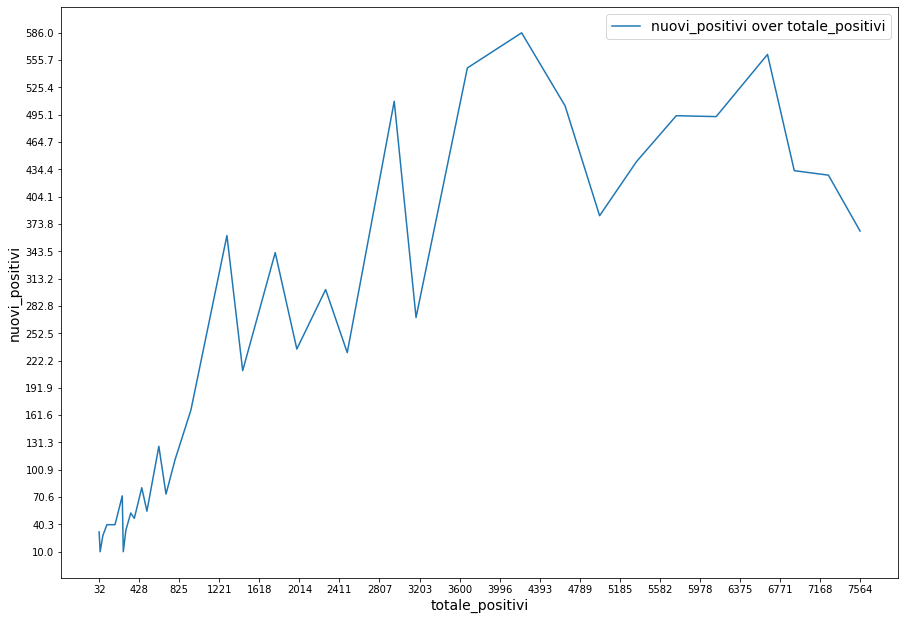

<Figure size 432x288 with 0 Axes>

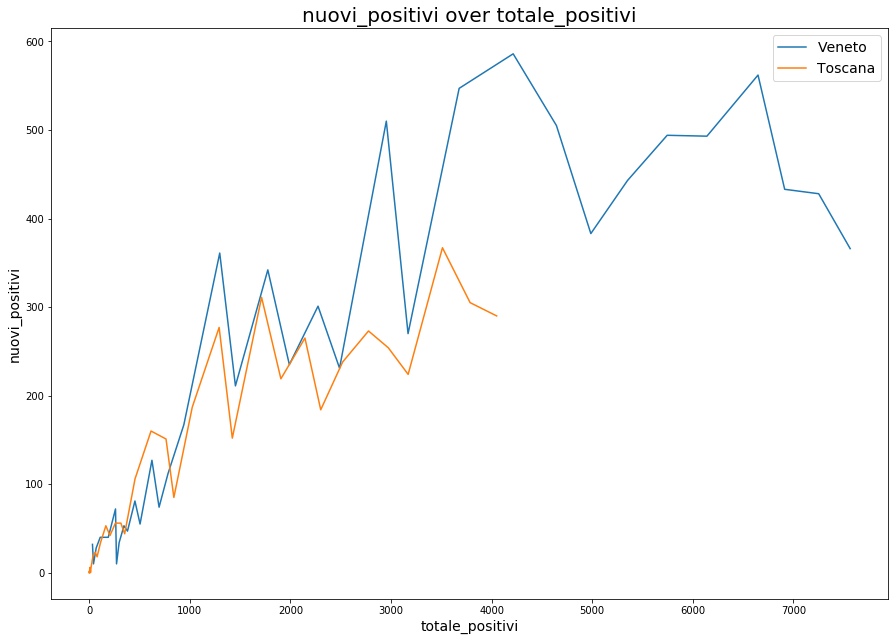

In [297]:
Ven=get_regione('Veneto',regioni)
Tosc=get_regione('Toscana',regioni)
inc=compute_increase(Ven,'totale_casi')
plot_df(Ven,'totale_positivi','nuovi_positivi')
multi_plot_df([Ven,Tosc],'totale_positivi','nuovi_positivi',names=['Veneto','Toscana'])

# Approximation attempt

we now try to approximate the function to a polynomial or to a logistic function in the first case we also have to assess the correct grade of the polynomial

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.pipeline import Pipeline

In [22]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_err,val_err=[],[]
    for i in range(1,len(X_train)):
        model.fit(X_train[:i],y_train[:i])
        y_train_pred=model.predict(X_train[:i])
        y_val_pred=model.predict(X_val)
        train_err.append(mean_squared_error(y_train[:i],y_train_pred[:i]))
        val_err.append(mean_squared_error(y_val[:i],y_val_pred[:i]))
    plt.figure(figsize=(20,20))
    plt.plot(np.sqrt(train_err),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_err),'b-',linewidth=2,label='validation')
    plt.legend(fontsize="xx-large")
    print('The training error is: ',np.sqrt(train_err[-1]))
    print('The validation error is: ',np.sqrt(val_err[-1]))    

this is a second degree polynomial approximation, we will later implement it in a pipeline to try to get the best degree approximation

Below a way of plotting approximation vs real data for a second degree polynomial

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 432x288 with 0 Axes>

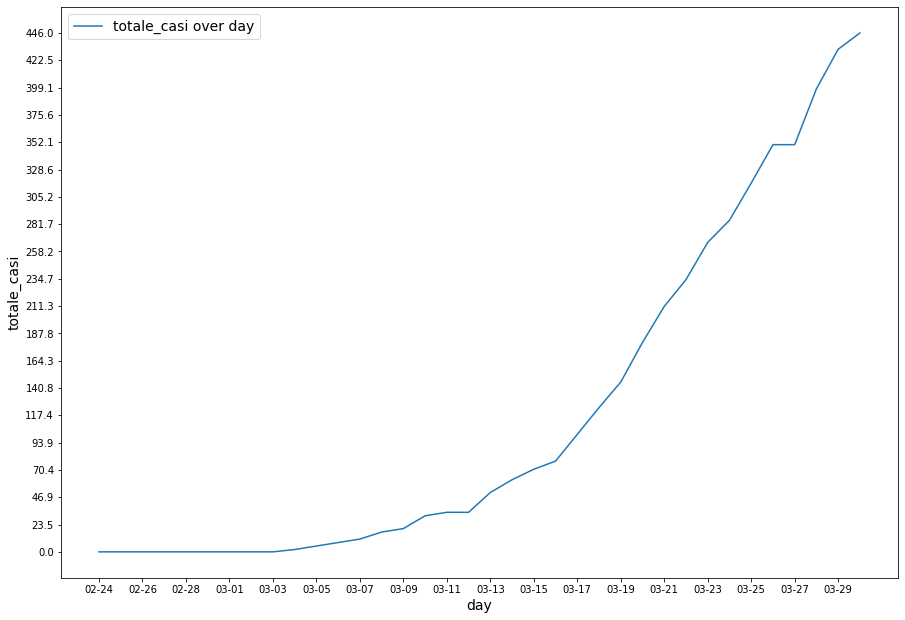

[]

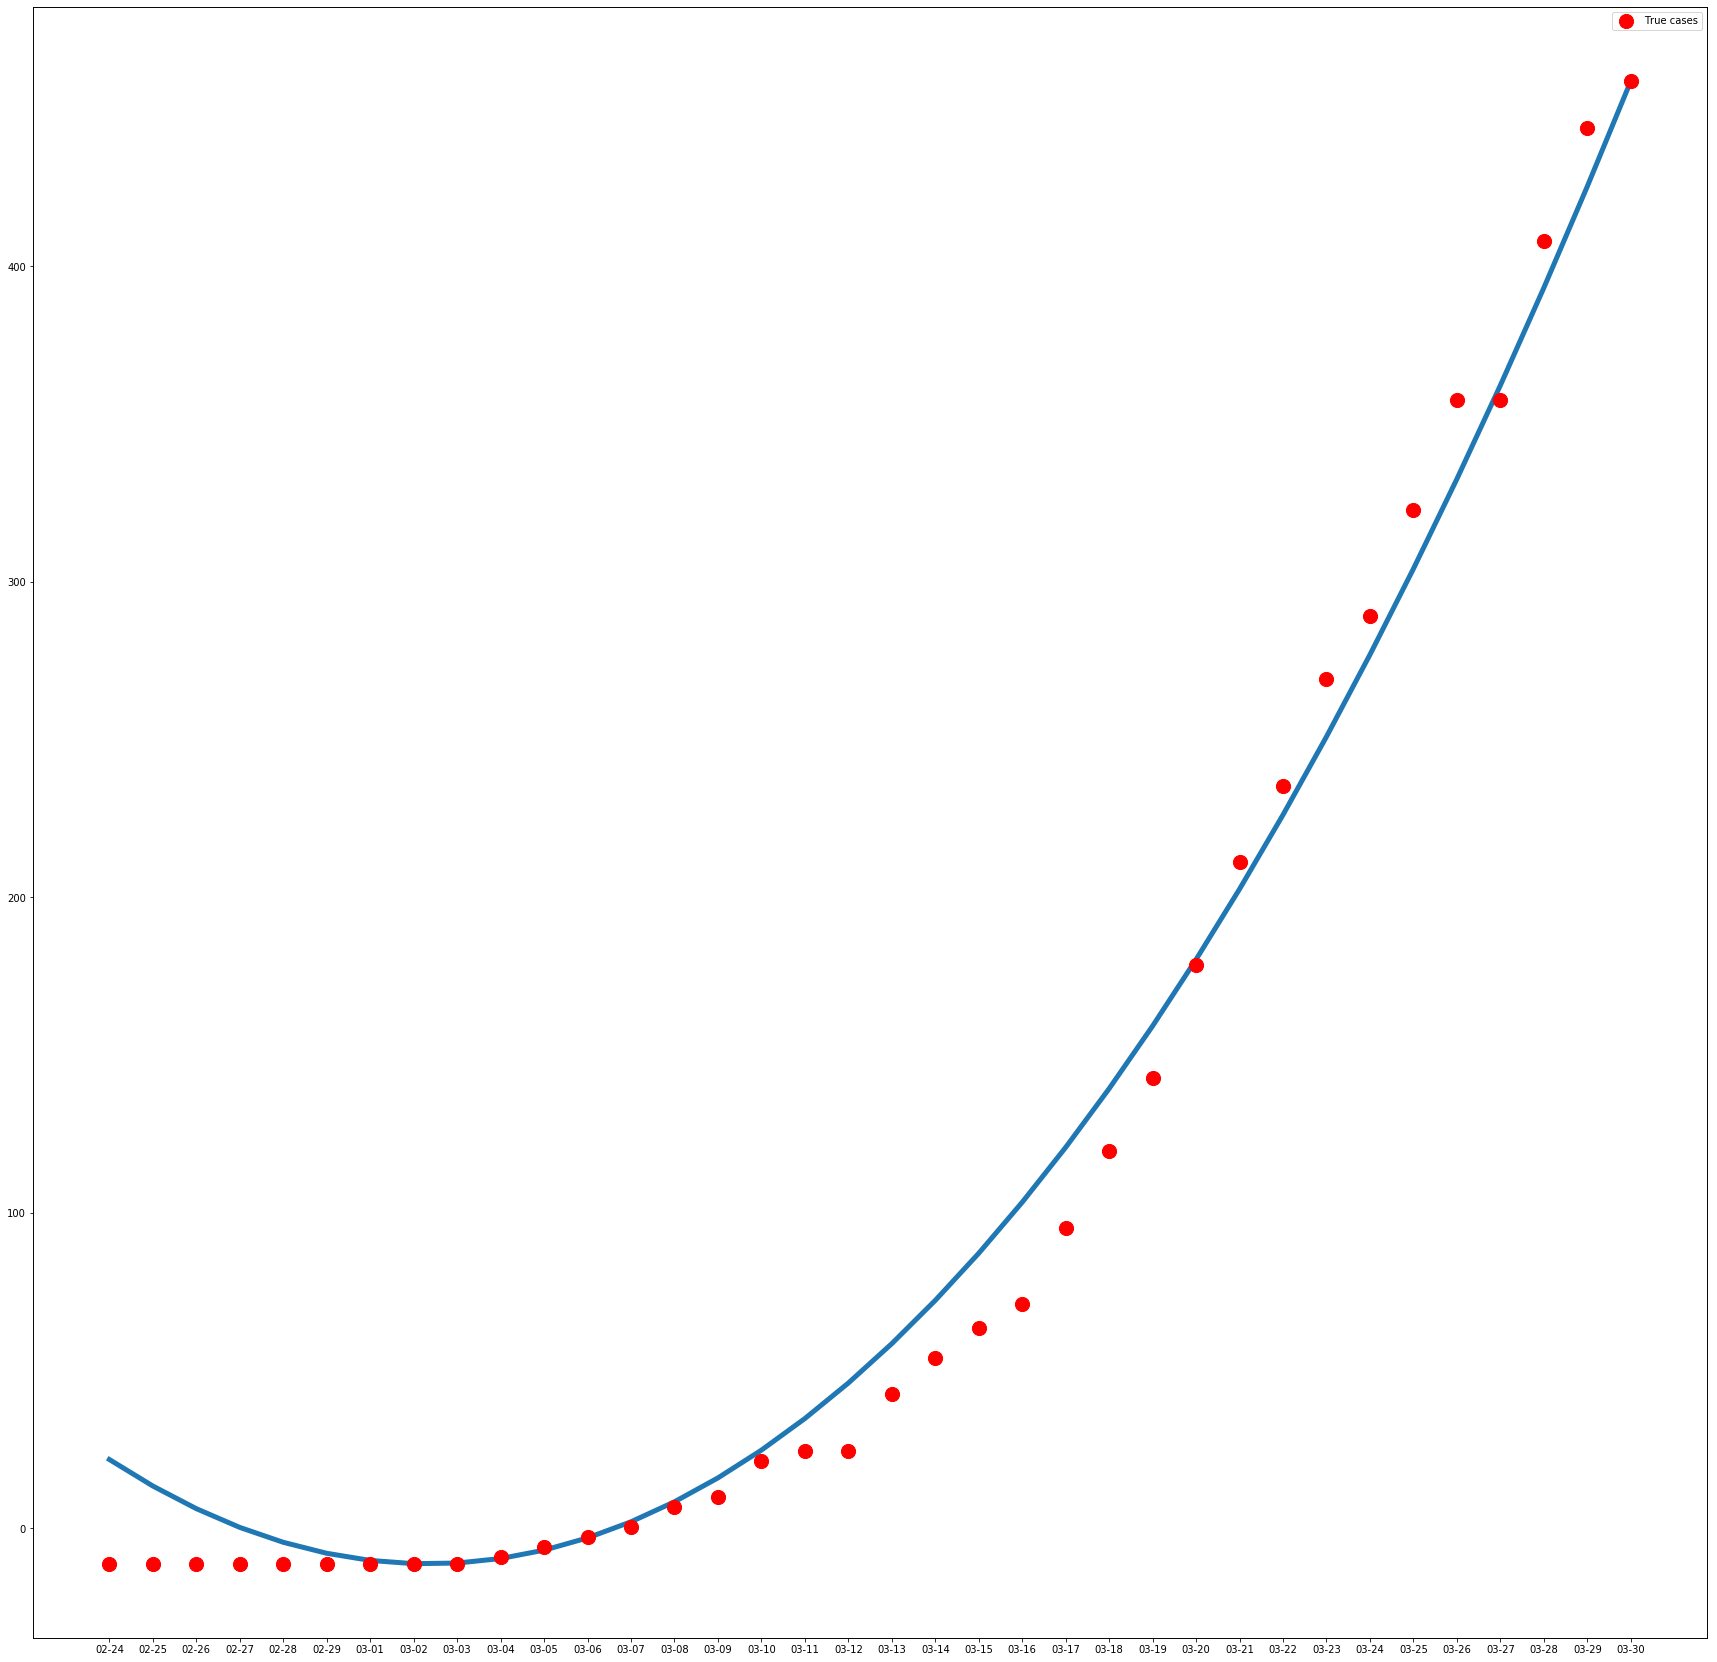

In [23]:
pisa=get_provincia('Pisa',province)
plot_df(pisa,'day','totale_casi')
p=PolynomialFeatures(degree=2,include_bias=False)
y=pisa['totale_casi']
X=np.arange(0,len(y)).reshape(-1,1)
X_pol=p.fit_transform(X)
lr=LinearRegression()
lr.fit(X_pol,y)
fig=plt.figure(figsize=(30,30))
ax1=fig.add_subplot(111)
ax2=ax1.twinx()
ax2.scatter(pisa['day'],pisa['totale_casi'],c='r',label='True cases',s=200)
#x=np.arange(0,n_obs)
#fun=lr.coef_[0]*x+lr.coef_[1]*x**2+lr.intercept_
ax1.plot(lr.predict(X_pol),label='approximation',linewidth=5)
plt.legend(loc='best')
ax2.set_yticks([])
#ax2.set_xticks([])


##problems###
#mettere a posto legenda fa cagare
    
    
##problemi##
#perchè non esce il label di approximation ma il plot si? diocane
#dobbiamo generalizzare sennò è un casino rifare il plot per un grado 10 hahahhaha
#confido nelle tue capacità di indexing


In [24]:
def plot_approx(area,asc,ords,degree=2):
    p=PolynomialFeatures(degree=degree,include_bias=False)
    y=area[ords]
    if asc=='day':
        X=np.arange(0,len(y)).reshape(-1,1)
    else:
        X=area[asc].to_numpy().reshape(-1,1)
    X_pol=p.fit_transform(X)
    lr=LinearRegression()
    lr.fit(X_pol,y)
    plt.clf()
    fig=plt.figure(figsize=(30,30))
    ax1=fig.add_subplot(111)
    ax2=ax1.twinx()
    ax2.scatter(area[asc],area[ords],c='r',label='True values',s=200)
    ax1.plot(X,lr.predict(X_pol),label='approximation',linewidth=5)
    plt.legend(loc='best')
    ax2.set_yticks([])

The training error is:  64.54419781711287
The validation error is:  46.68098148770311


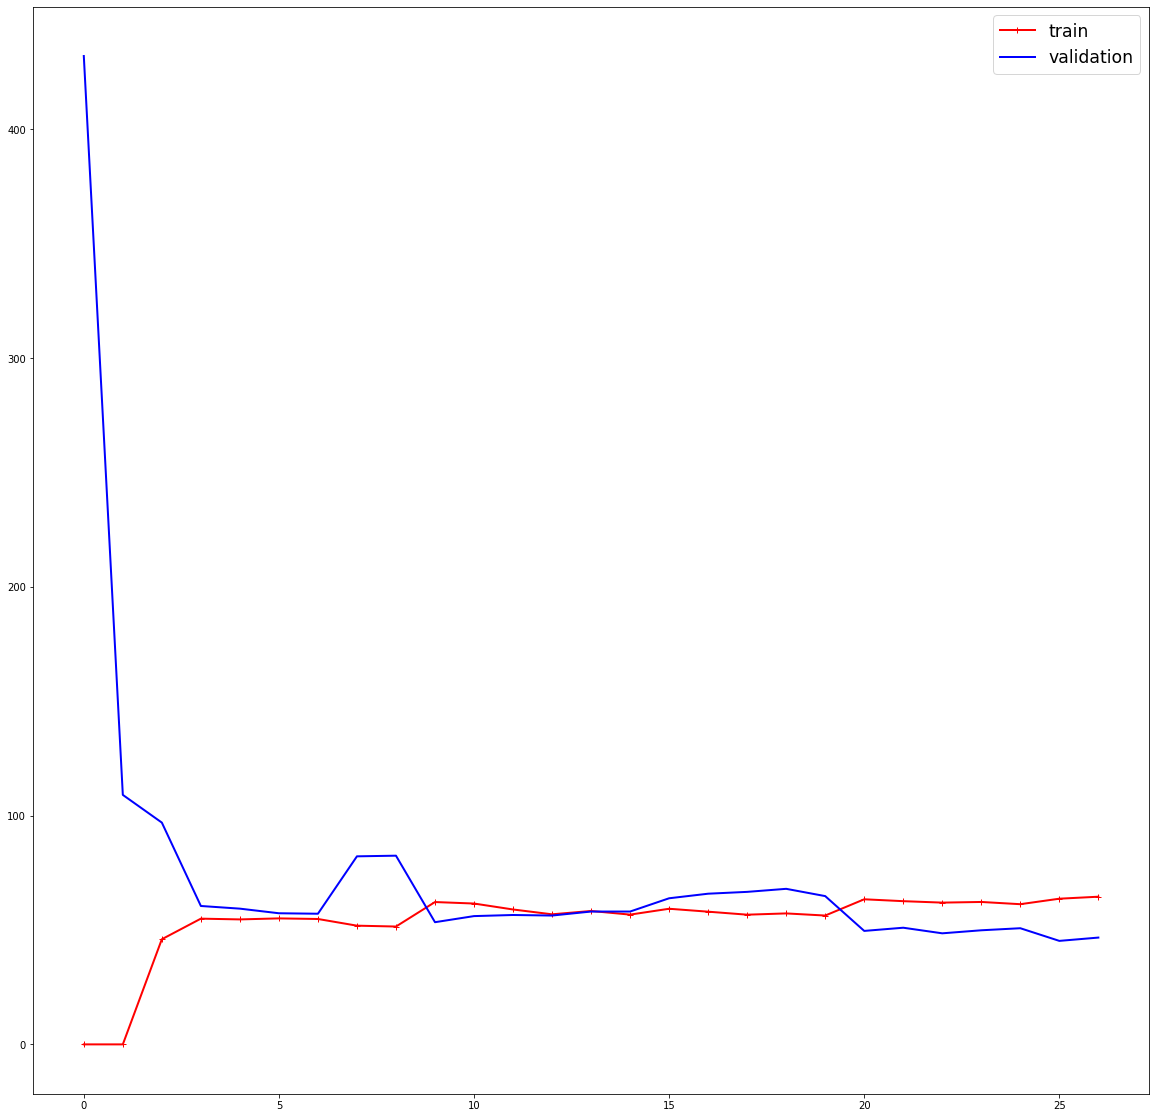

In [25]:
plot_learning_curves(lr,X,y)

##problems##
#sarebbe carino zoommare il plot per capire a che errore si stabilizza
#se impossibile almeno stampare l'errore finale
#runnandolo più volte l'errore è molto random, probabilmente perchè c'è overfitting o 
#semplicemente perchè ci sono pochi dati a disposizione, una soluzione si incontrerebbe
#facendo regression su più dati, questa è una prova su pisa a caso


Now we will try to check which is the best degree for approximating these data

The training error is:  59.135999776726855
The validation error is:  67.39681739382102
The training error is:  3.7911066740300545
The validation error is:  6.412090099298252
The training error is:  4.594222855497793
The validation error is:  27.670618212481575


<Figure size 432x288 with 0 Axes>

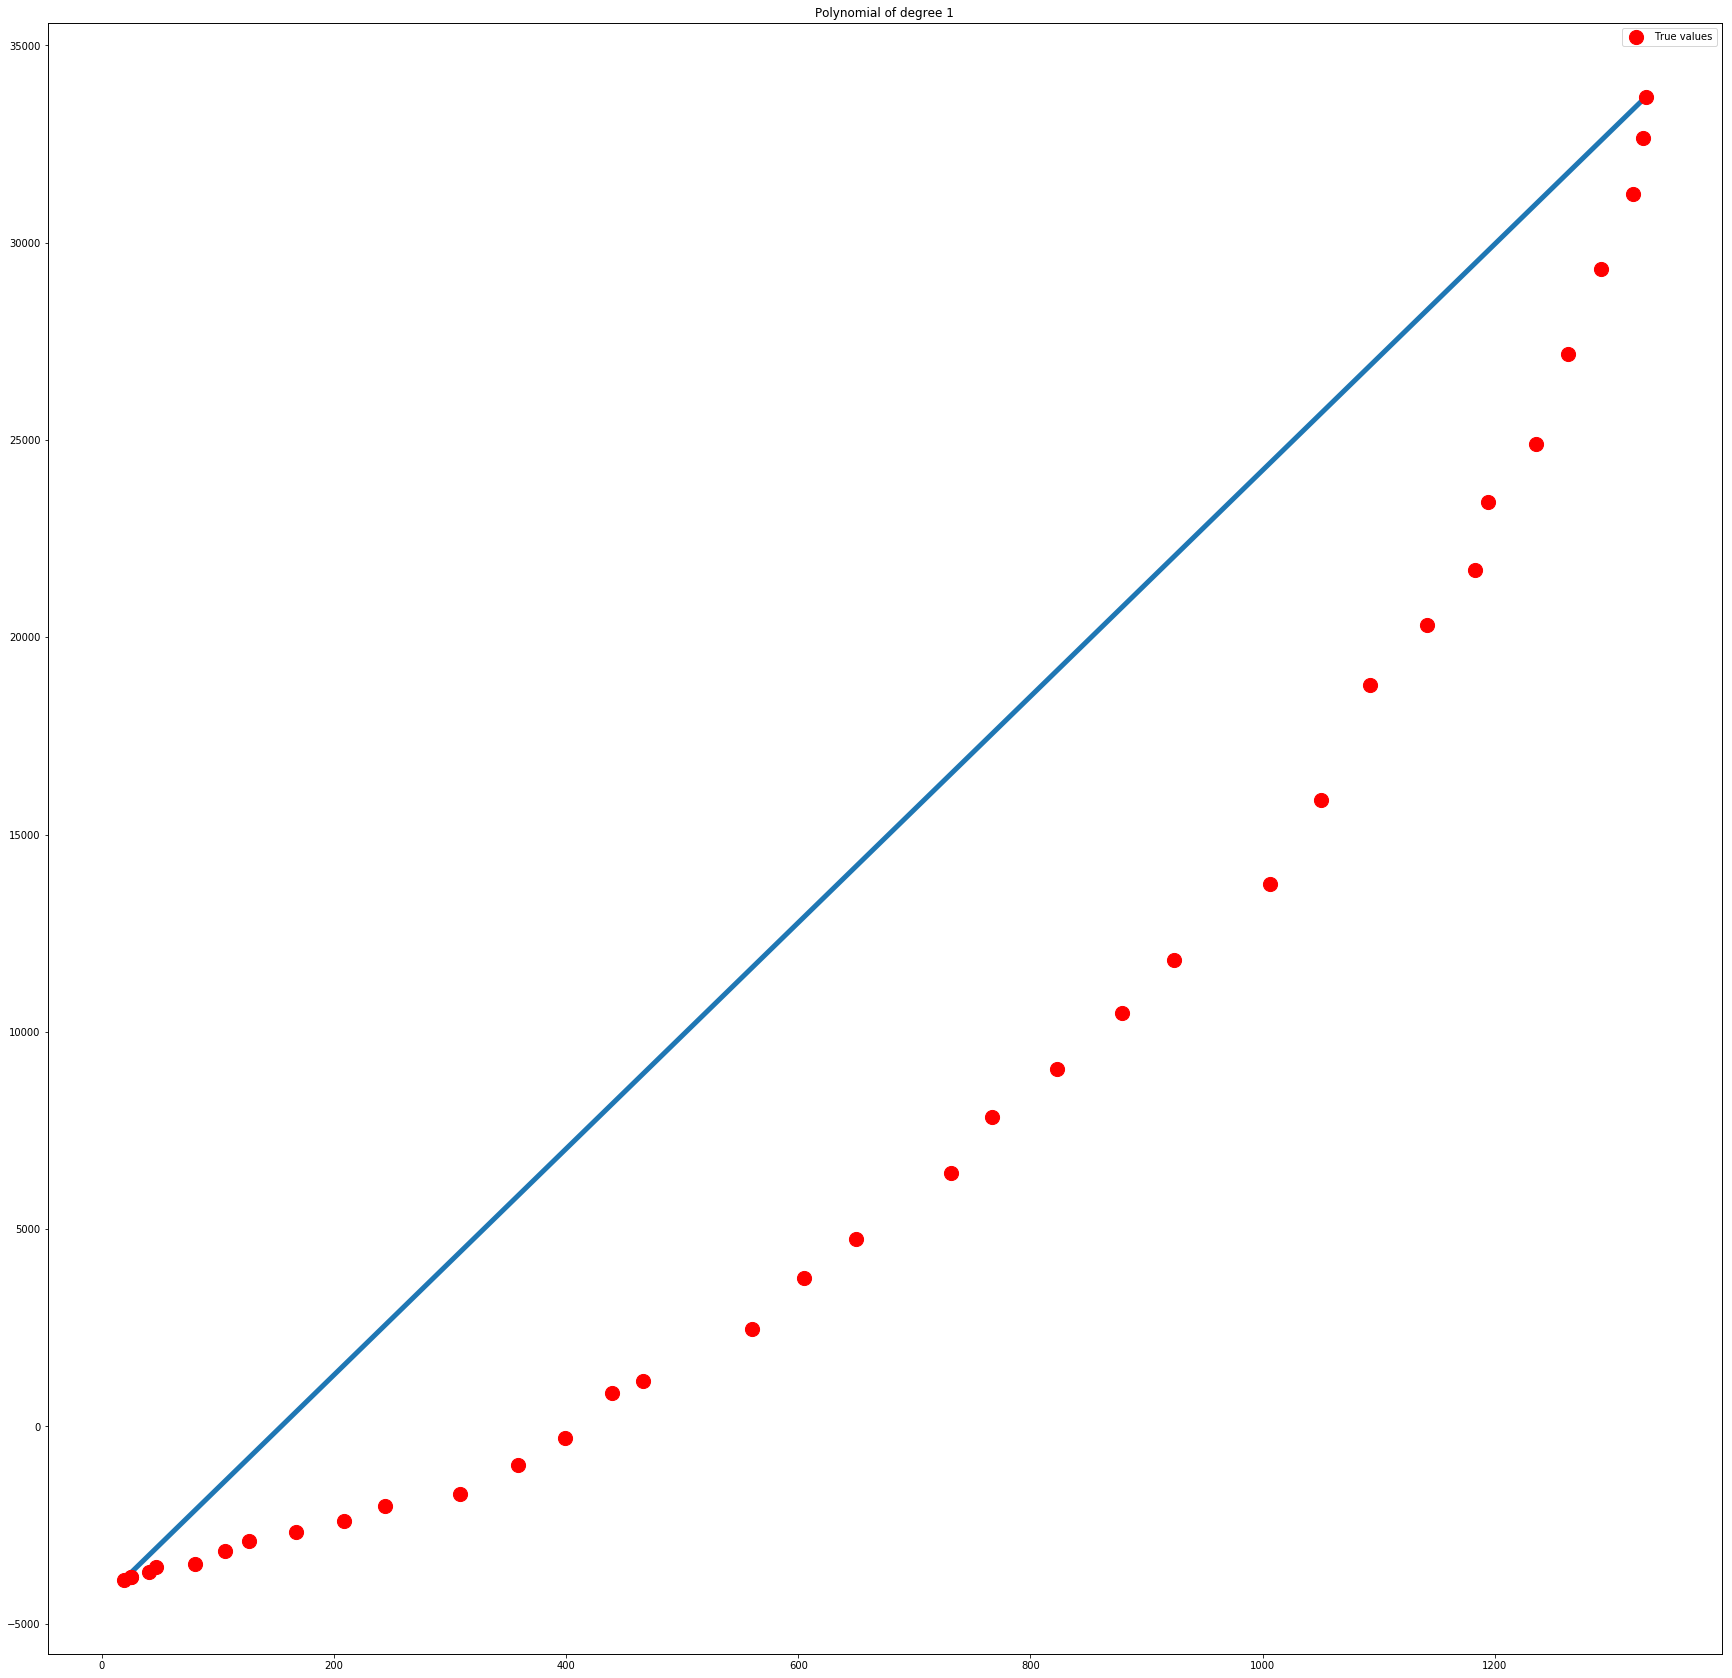

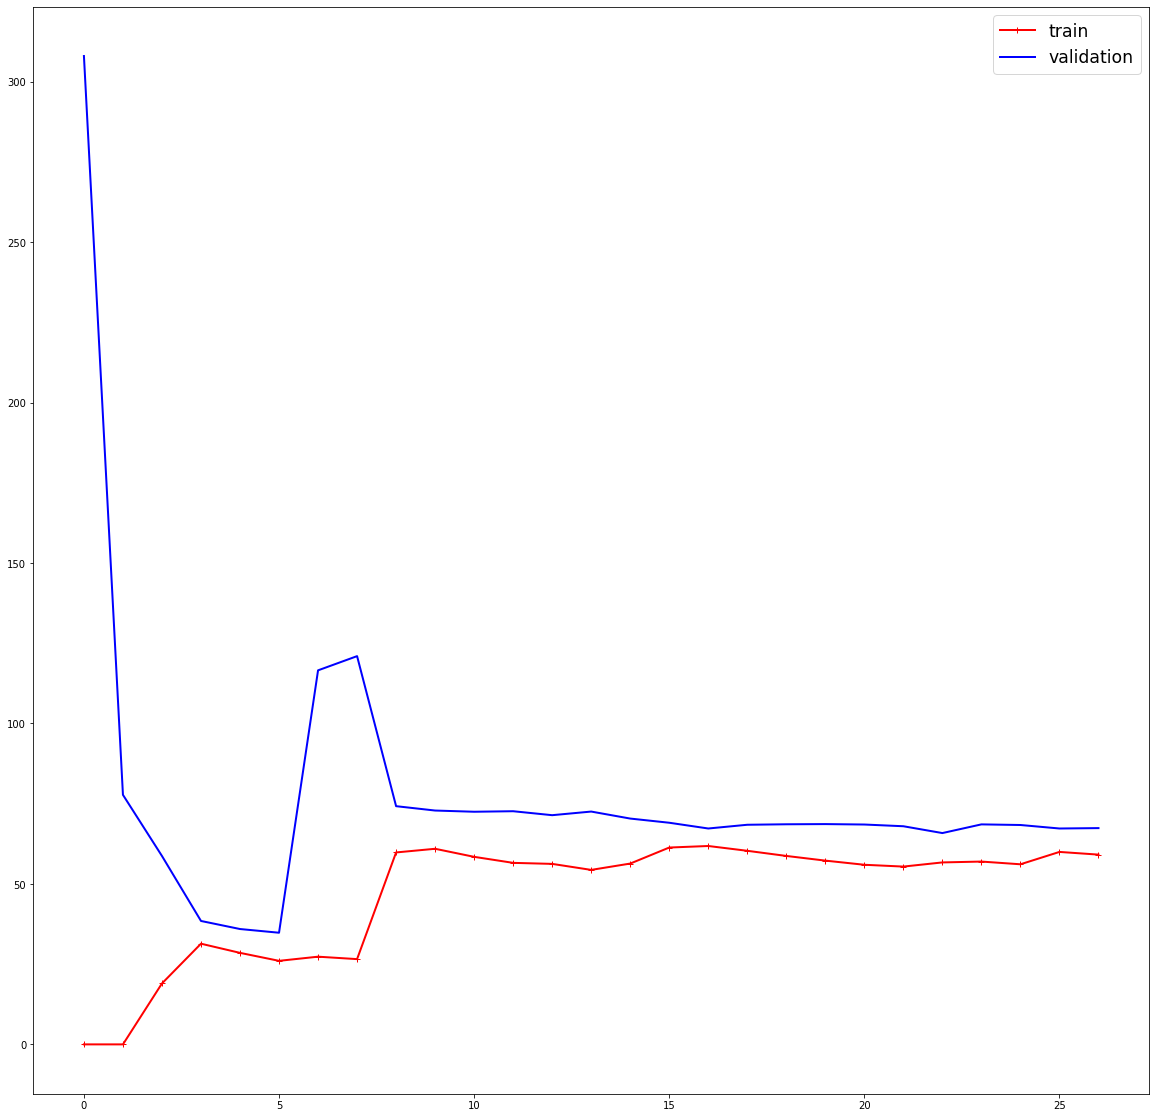

<Figure size 432x288 with 0 Axes>

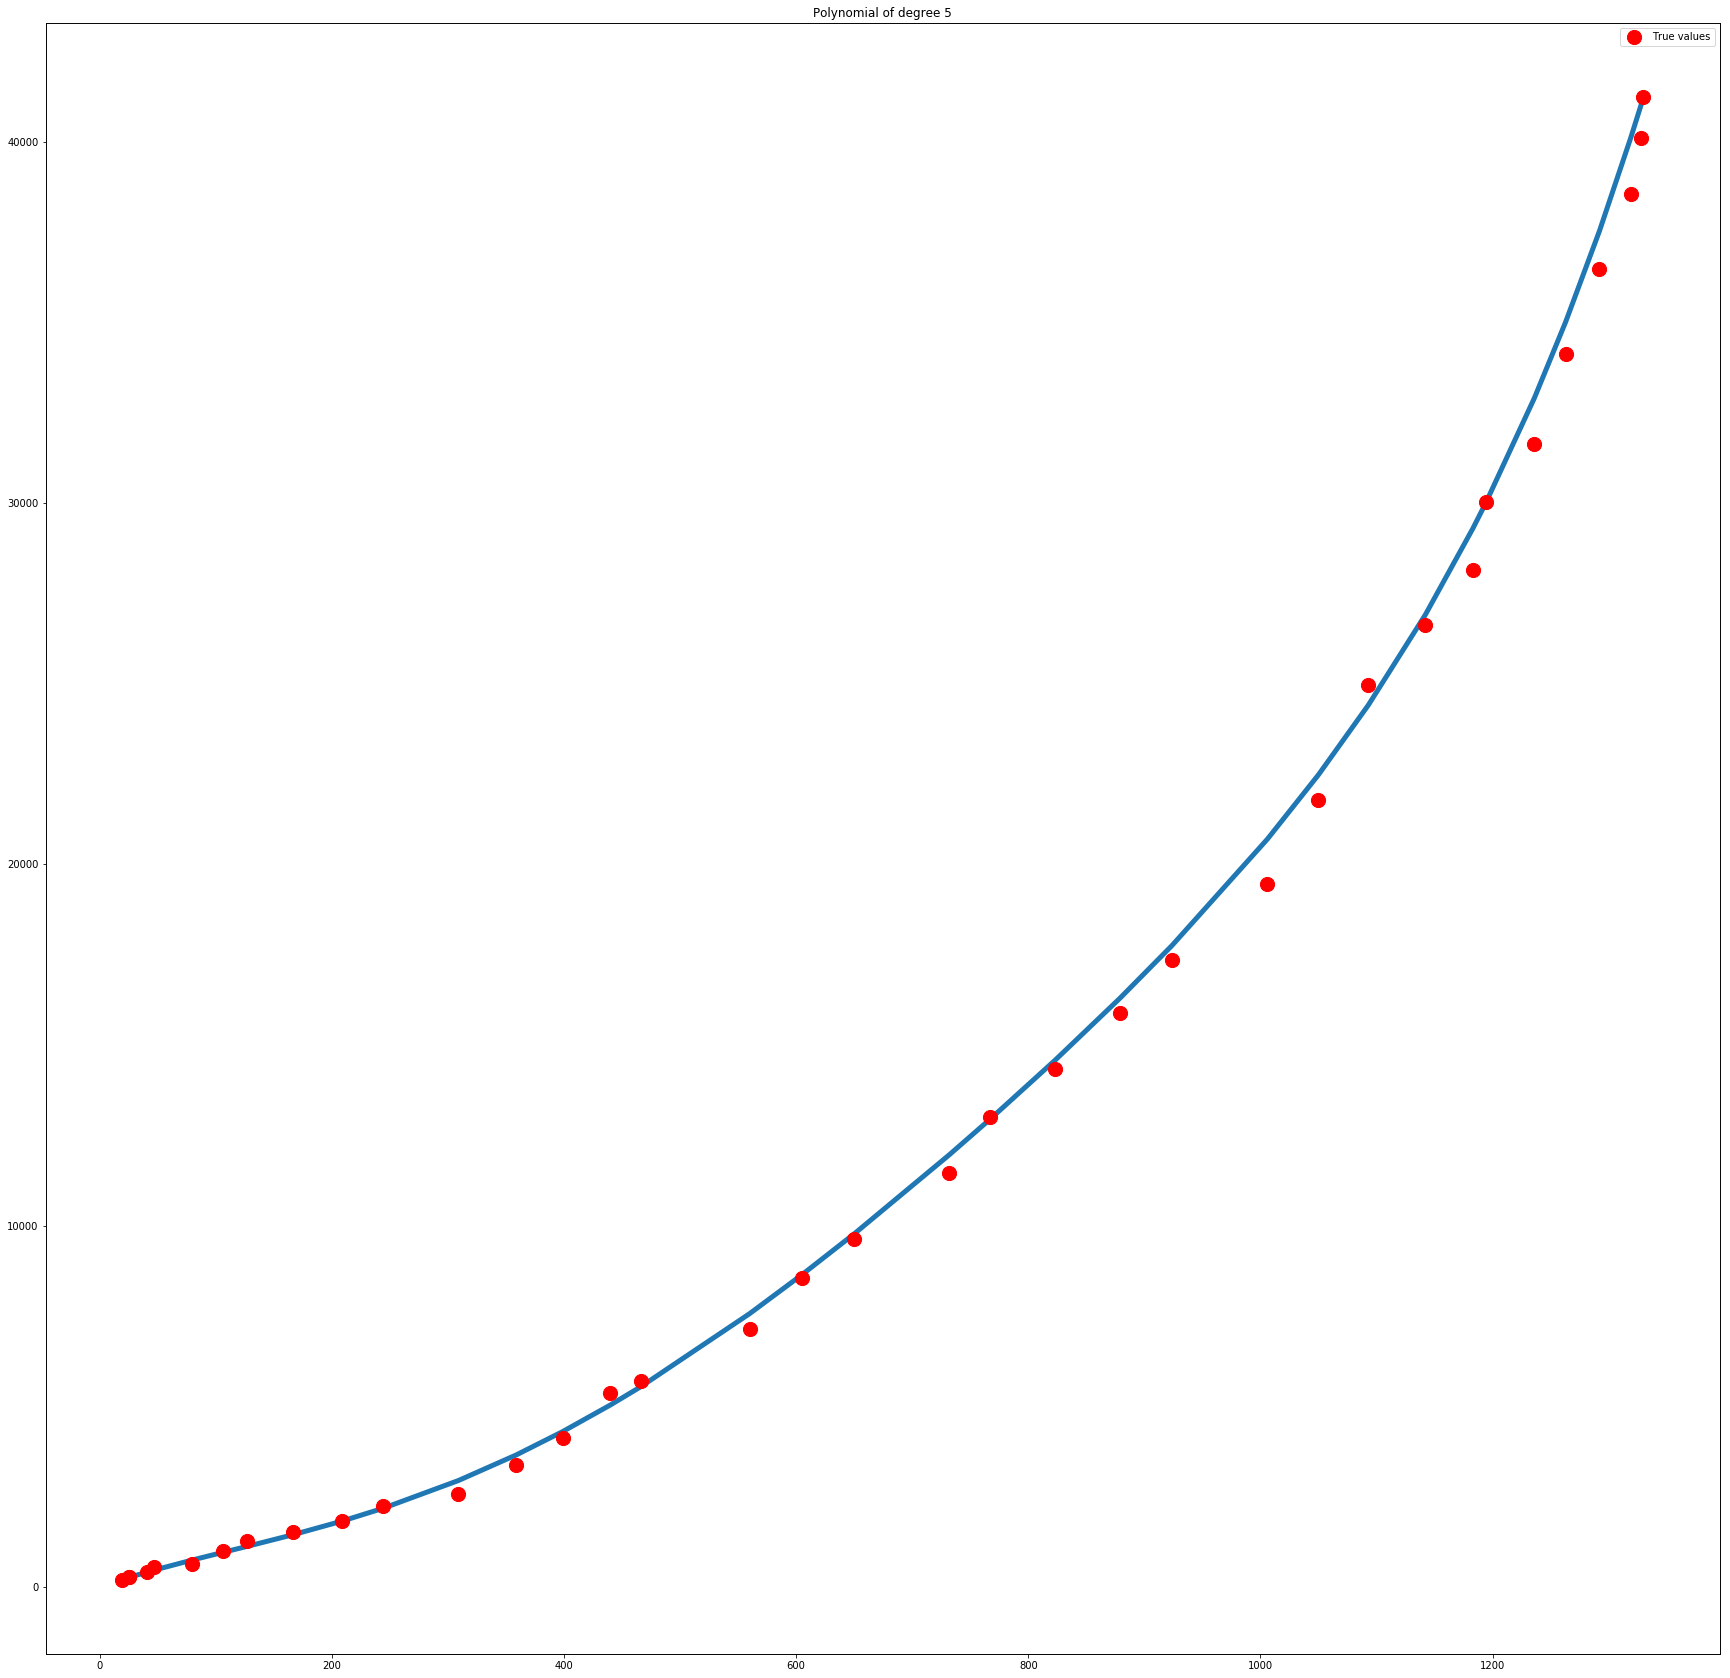

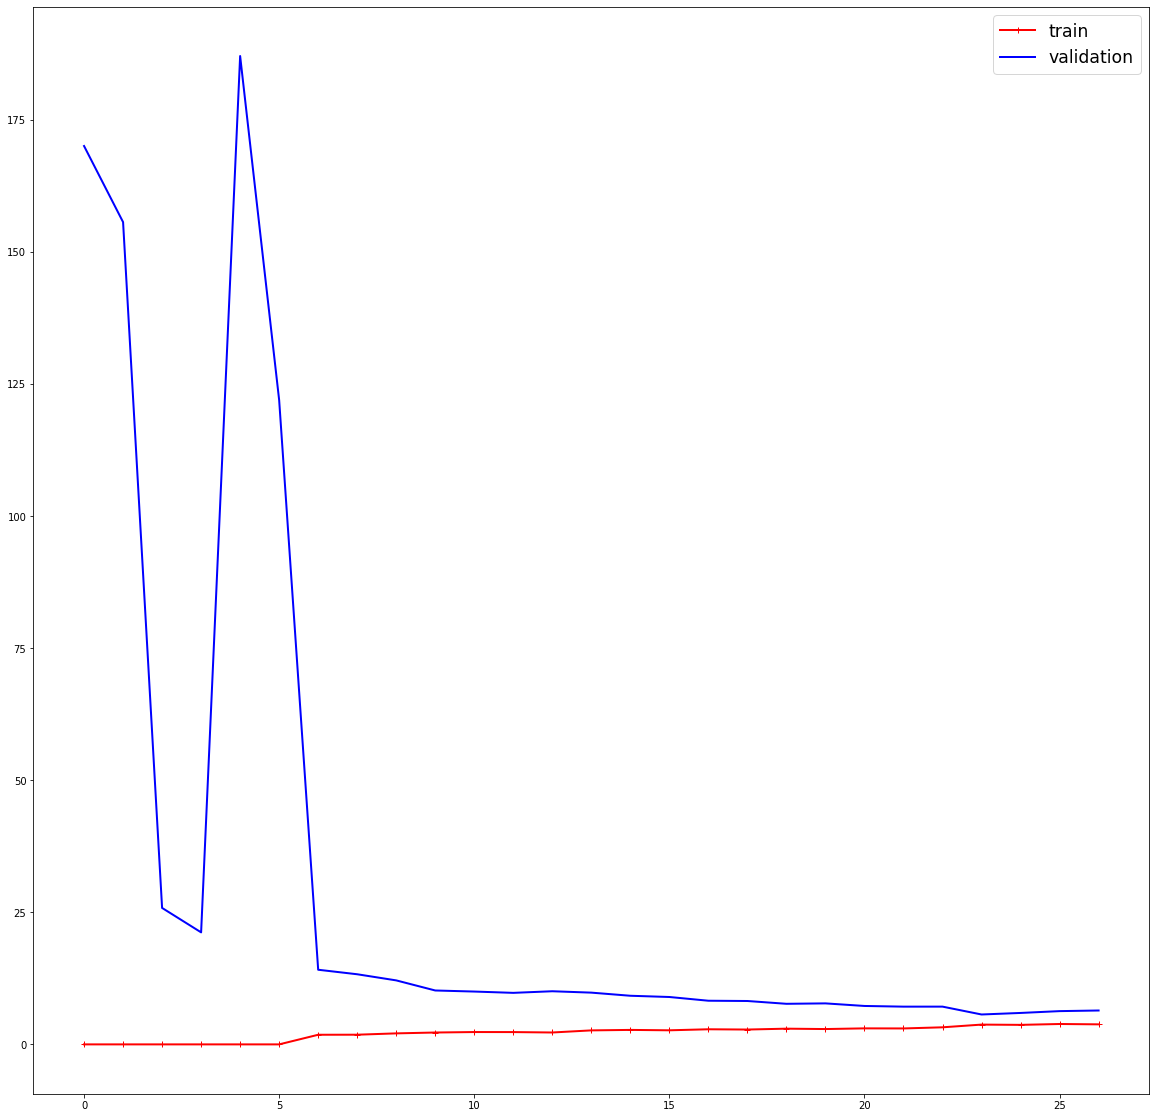

<Figure size 432x288 with 0 Axes>

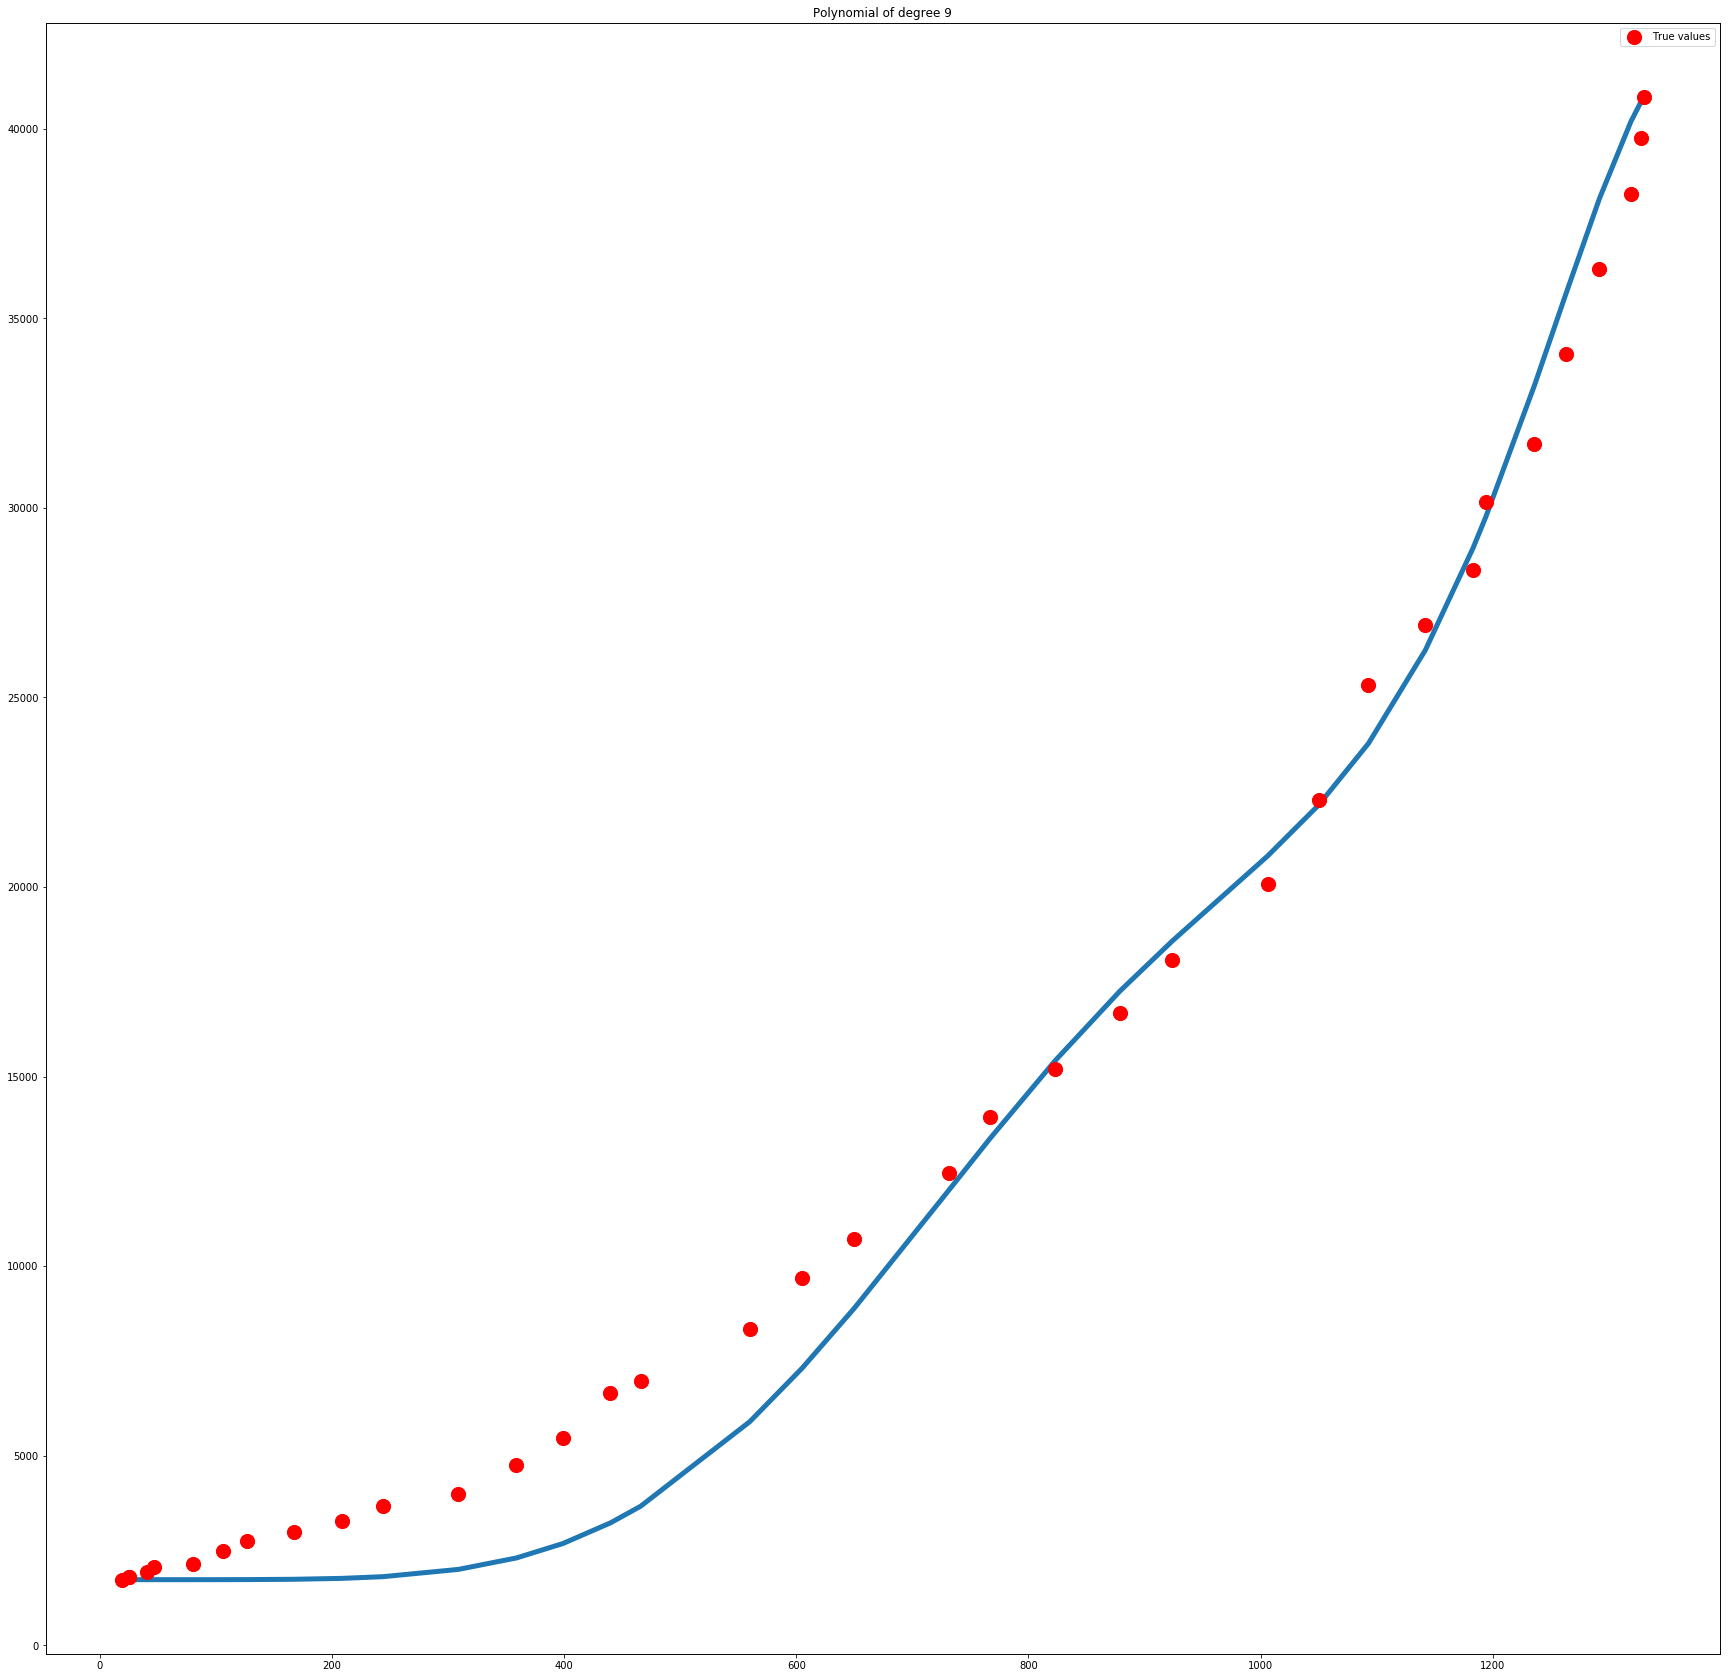

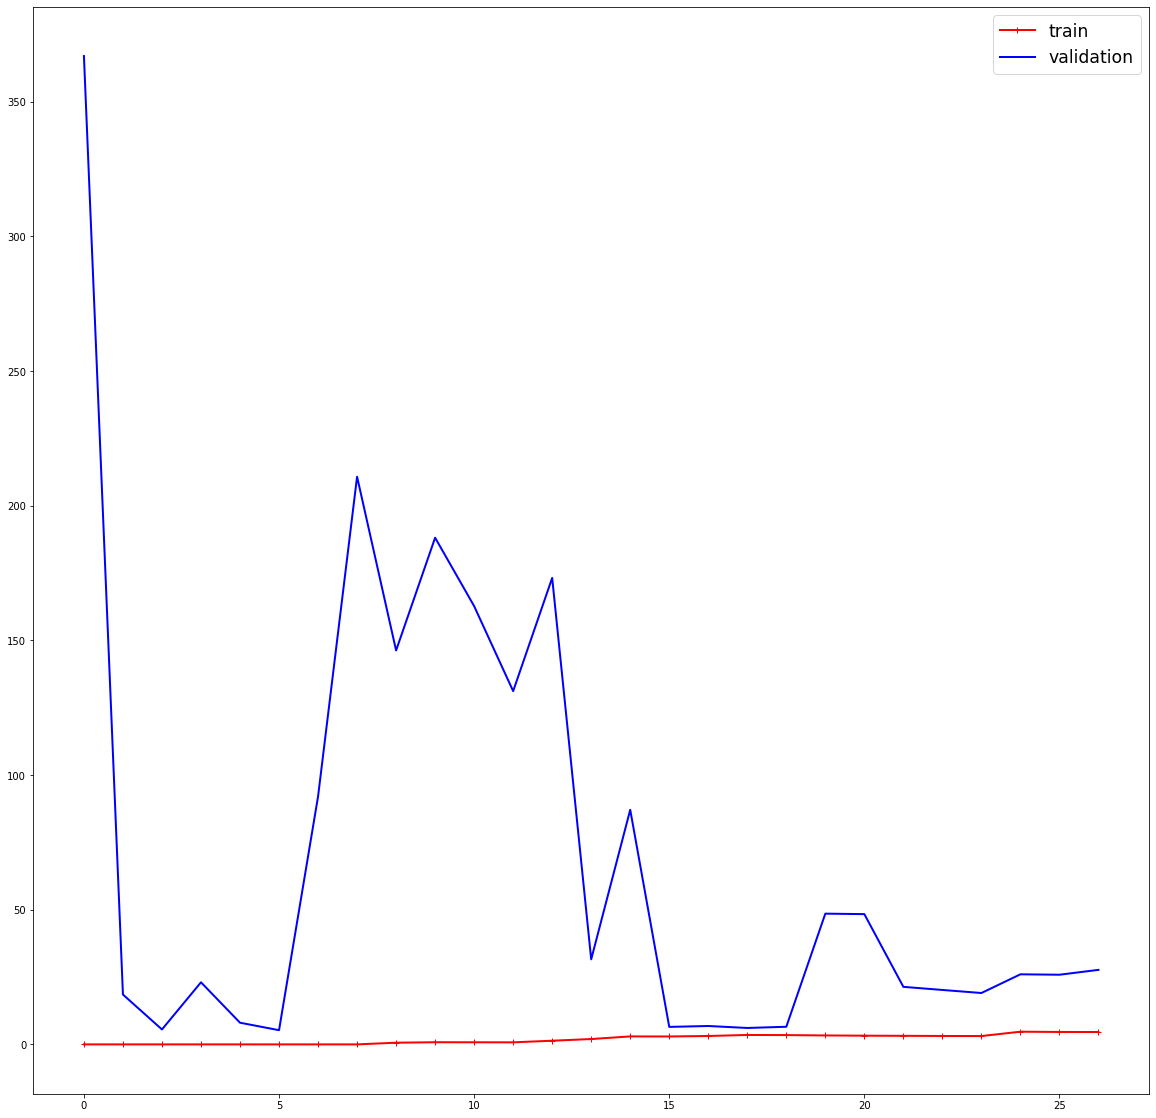

In [26]:
for i in range(10):
    pol_reg=Pipeline([('p',PolynomialFeatures(degree=i,include_bias=False)),('lr',LinearRegression())])
    if i==1 or i==5 or i==9:
        plt.figure()
        plot_approx(Lom,'terapia_intensiva','totale_casi',degree=i)
        plt.title(f'Polynomial of degree {i}')
        plot_learning_curves(pol_reg,X,y)
#SEMBRA FUNZIONARE MA NON E' CORRETTO, X AND y NON C'ENTRANO

the following is an attempt to plot the approximation versus reality graph of a some data

<Figure size 432x288 with 0 Axes>

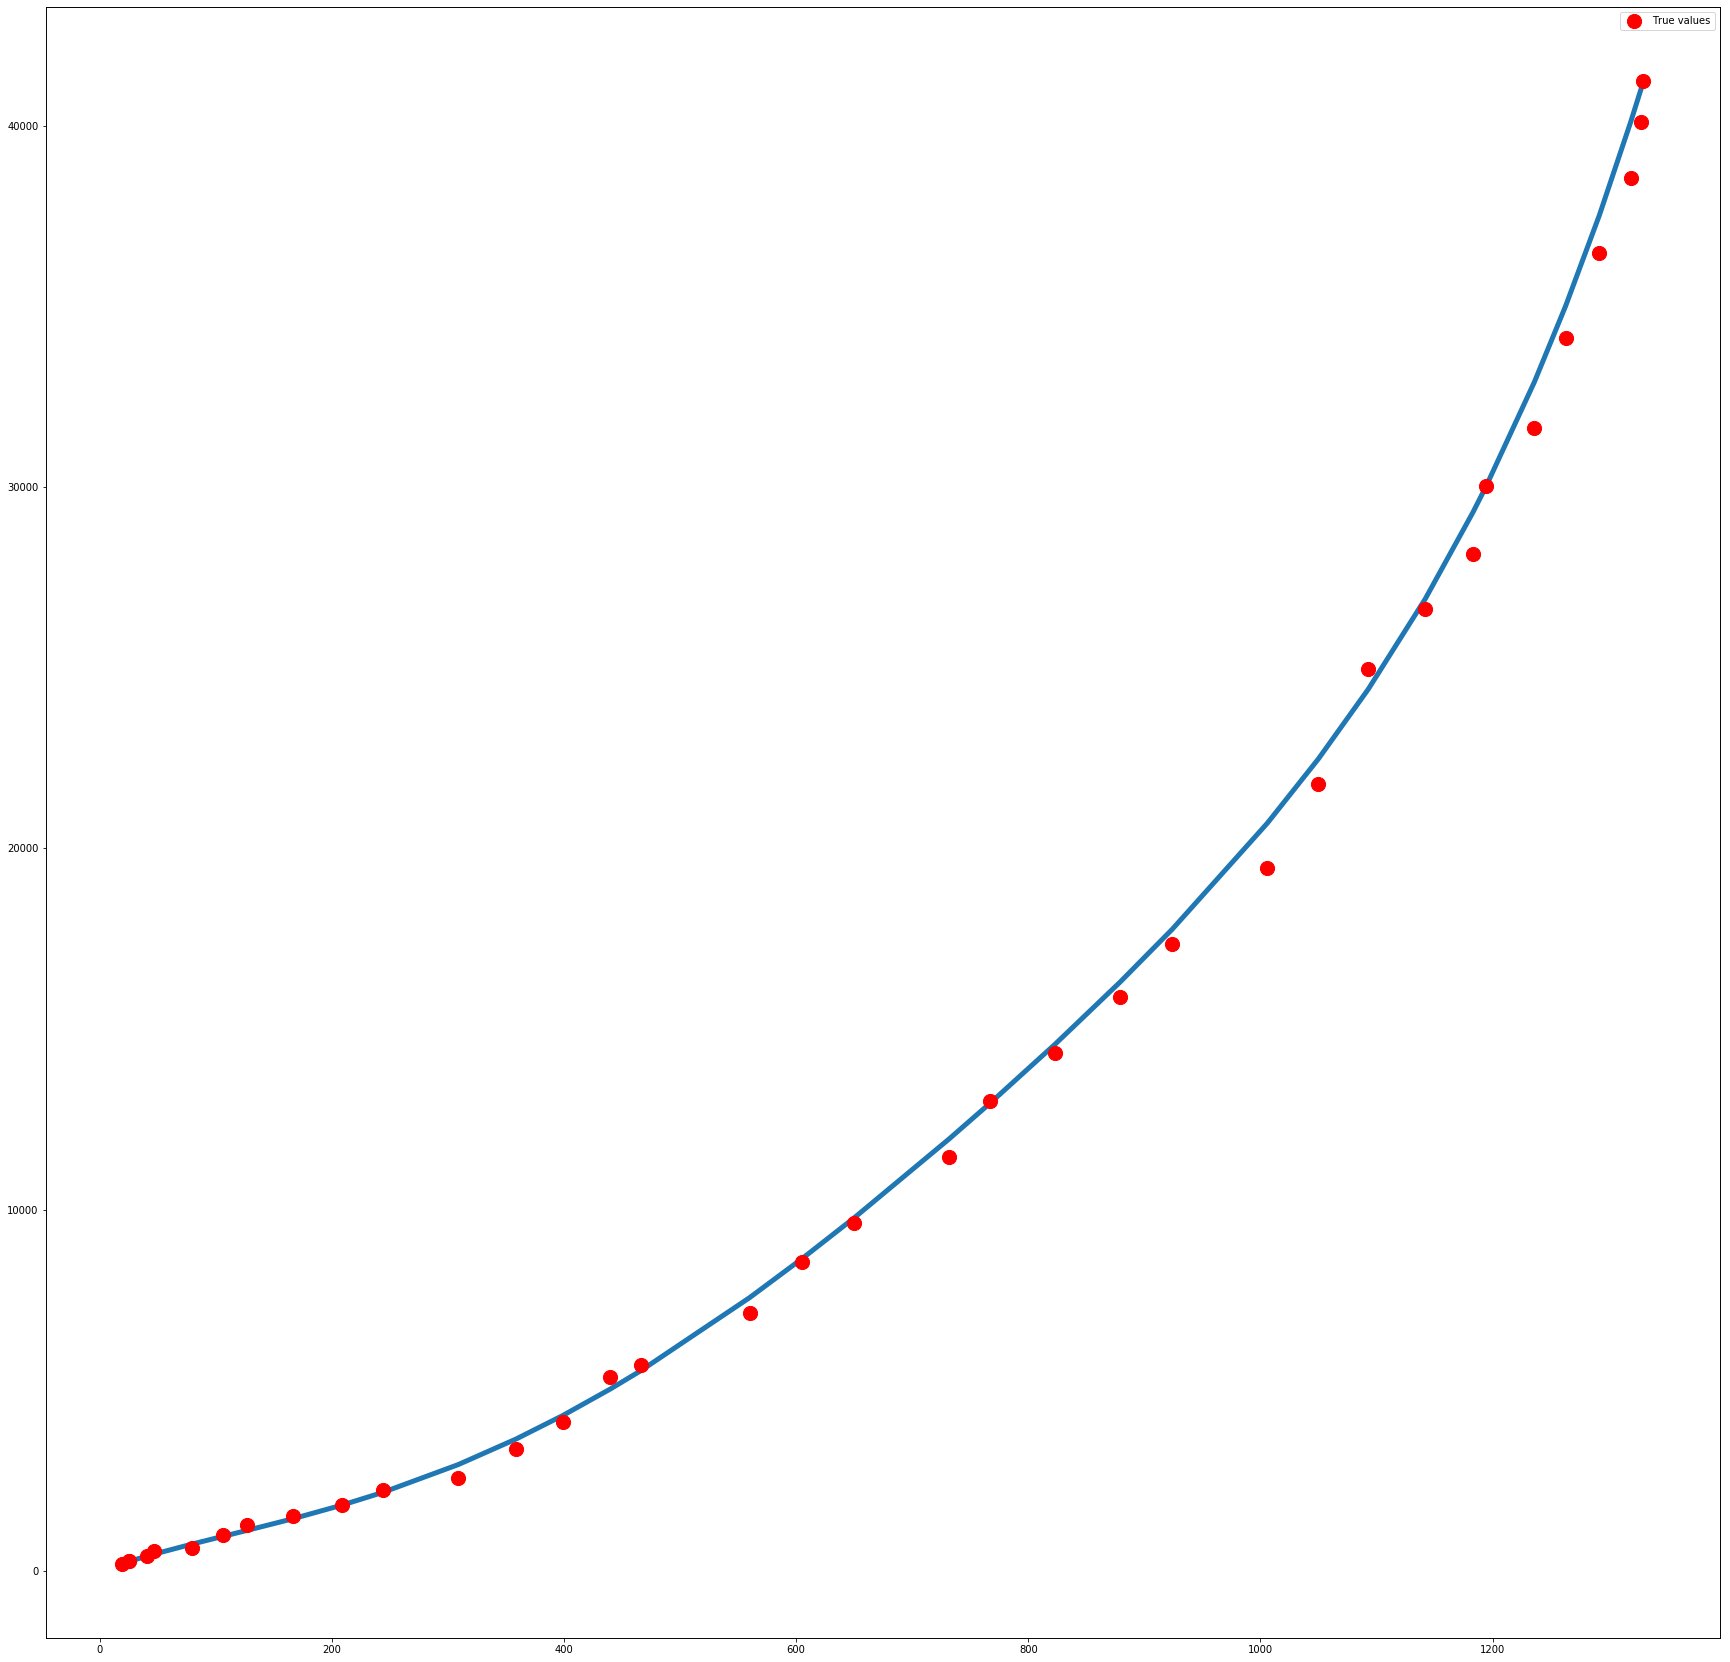

In [33]:
plot_approx(Lom,'terapia_intensiva','totale_casi',degree=5)

Now we attempt to reproduce a Logistic approximation

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


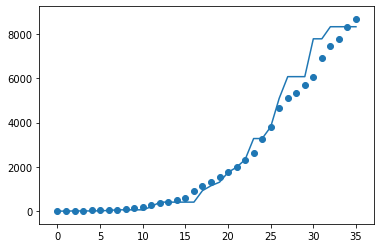

In [114]:
mil=get_provincia('Milano',province)
#plot_df(mil,'day','totale_casi')
X=np.arange(len(mil['day'])).reshape(-1,1)
y=mil['totale_casi']
log_r=LogisticRegression()
log_r.fit(X,y)
plt.plot(X,log_r.predict(X))
plt.scatter(X,y)


array([ -123708.59542523,   133773.13396964, 90373090.17141637])

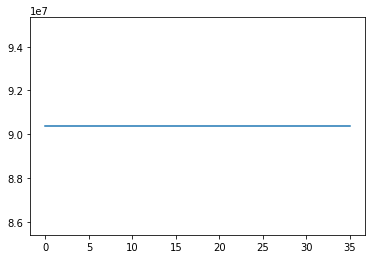

In [193]:
from scipy.optimize import minimize
X=np.arange(len(mil['day']))
y=mil['totale_casi']
def logistic(x,L,k,x0,d):
    return d+L/(1+np.exp(-k*(x-x0)))
def gaussian(x,sig,mi,d):
    return d+1/(np.sqrt(2*np.pi)*sig)*np.exp(-0.5*(1/sig**2)*(x-mi)**2)
def discrepancy(L,k,x0,d,x,y):
    return np.sum((y-logistic(x,L,k,x0,d)**2))
def discrepancy2(sig,mi,d,x,y):
    return np.sum((y-gaussian(x,sig,mi,d)**2))
init_vals=[max(y),np.median(x),1,np.min(x)]
other=[5,4,4]
sol=minimize(lambda z:discrepancy(z[0],z[1],z[2],z[3],X,y),init_vals)
sol2=minimize(lambda z:discrepancy2(z[0],z[1],z[2],X,y),other)

sig_opt,mi_opt,d_opt=sol2.x
y_opt=gaussian(X,sig_opt,mi_opt,d_opt)
plt.plot(X,y_opt)
sol2.x


In [272]:
from scipy.optimize import curve_fit
import warnings
mil=get_provincia('Milano',province)
def logistic(x,L,k,x0,d):
    return d+L/(1+np.exp(-k*(x-x0)))
def logistic2(x,L,k,d):
    return d+L/(1+np.exp(-k*(x-np.median(x))))

X=np.arange(len(mil['day']),dtype=float)
y=np.array([mil['totale_casi'].to_numpy()[i] for i in range(len(mil['totale_casi']))],dtype=float)
init_vals=[max(y),np.median(x),1,np.min(x)]
init_vals_2=[max(y),100,np.min(x)]

#y2=logisti
#init_vals2=[np.max(y),np.median(x),4]
best_vals,covar=curve_fit(logistic2,xdata=x.flatten(),ydata=y.flatten(),p0=init_vals_2)
#best_vals,covar=curve_fit(gaussian,xdata=x.flatten(),ydata=y.flatten(),p0=init_vals2)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


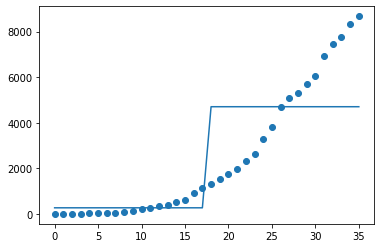

In [273]:
plt.scatter(X,y)
plt.plot(X,logistic2(X,best_vals[0],best_vals[1],best_vals[2]))

In [274]:
best_vals

array([4436.6111111 ,  100.        ,  268.44444444])

numpy.float64

up next:


    1. problemi vari da risolvere
    2. a link I found for data fitting: https://lmfit.github.io/lmfit-py/model.html BLEAH
     che figo, tabulando viene colorato
    3.generalizzazione/interattivizzazione
    4. interactive widgets https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
    5. check magic commands
    6. il database dovrebbe essere https://ec.europa.eu/eurostat/web/cities/data/database
    7. USE BINDER FOR SHARING
    
    
    
    